**Basic_model**

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load the CSV file into a DataFrame
df = pd.read_csv('airbnb_Miami.csv', parse_dates=['Created Date', 'Scraped Date'])

# Keep only data where superhost_period_all is between 5 and 12
df = df[df['superhost_period_all'].between(5, 12)]

# Handle missing values for continuous variables
continuous_columns = [
    'Nightly_Rate', 'prev_Nightly_Rate', 'available_days',
    'available_days_aveListedPrice', 'booked_days', 'booked_days_avePrice',
    'prev_available_days', 'prev_available_days_aveListedPrice',
    'prev_booked_days', 'prev_booked_days_avePrice', 'tract_count_obs',
    'tract_superhosts_ratio', 'tract_prev_superhosts_ratio',
    'tract_price_variance', 'revenue_period_tract', 'booked_days_period_tract'
]

for col in continuous_columns:
    mean = df[col].mean()
    std = df[col].std()
    lower_bound = mean - 3 * std
    upper_bound = mean + 3 * std
    df[col] = df[col].apply(lambda x: lower_bound if pd.isnull(x) else (upper_bound if x > upper_bound else x))

# Replace missing values for the categorical variable with the mode
df['superhost_period_all'] = df['superhost_period_all'].fillna(df['superhost_period_all'].mode()[0])

# Create a new variable 'age'
df['age'] = (df['Scraped Date'] - df['Created Date']).dt.days

# Create a new variable 'Avg_booking' and handle division by zero
df['Avg_booking'] = df.apply(lambda row: row['revenue_period_tract'] / row['booked_days_period_tract']
                             if row['booked_days_period_tract'] > 0 else 0, axis=1)

# Drop rows where 'Avg_booking' is NaN (if any remain after above handling)
df = df.dropna(subset=['Avg_booking'])

# Define the predictors
predictors = [
    'age', 'Nightly_Rate', 'prev_Nightly_Rate', 'available_days',
    'available_days_aveListedPrice', 'booked_days', 'booked_days_avePrice',
    'prev_available_days', 'prev_available_days_aveListedPrice',
    'prev_booked_days', 'prev_booked_days_avePrice', 'tract_count_obs',
    'tract_superhosts_ratio', 'tract_prev_superhosts_ratio',
    'tract_price_variance'
]

# Aggregate at the census_tract level
grouped = df.groupby('census_tract')[predictors + ['Avg_booking']].mean().reset_index()

# Prepare the predictors (X) and the target (y)
X = grouped[predictors]
y = grouped['Avg_booking']

# Add a constant to the model (intercept)
X_const = sm.add_constant(X)

# Fit the model using statsmodels
model = sm.OLS(y, X_const).fit()

# Print out the statistics
print(model.summary())

# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print("\nVIF values:")
print(vif_data)






<ipython-input-2-510aff1fa0b6>:8: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df = pd.read_csv('airbnb_Miami.csv', parse_dates=['Created Date', 'Scraped Date'])
<ipython-input-2-510aff1fa0b6>:8: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df = pd.read_csv('airbnb_Miami.csv', parse_dates=['Created Date', 'Scraped Date'])


                            OLS Regression Results                            
Dep. Variable:            Avg_booking   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     206.8
Date:                Thu, 07 Dec 2023   Prob (F-statistic):          9.30e-216
Time:                        21:03:05   Log-Likelihood:                -2764.3
No. Observations:                 571   AIC:                             5561.
Df Residuals:                     555   BIC:                             5630.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

**Model with only significant variables**

In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load the CSV file into a DataFrame
df = pd.read_csv('airbnb_Miami.csv', parse_dates=['Created Date', 'Scraped Date'])

# Keep only data where superhost_period_all is between 5 and 12
df = df[df['superhost_period_all'].between(5, 12)]

# Handle missing values for continuous variables
continuous_columns = [
    'Nightly_Rate', 'prev_Nightly_Rate', 'available_days',
    'available_days_aveListedPrice', 'booked_days', 'booked_days_avePrice',
    'prev_available_days', 'prev_available_days_aveListedPrice',
    'prev_booked_days', 'prev_booked_days_avePrice', 'tract_count_obs',
    'tract_superhosts_ratio', 'tract_prev_superhosts_ratio',
    'tract_price_variance', 'revenue_period_tract', 'booked_days_period_tract'
]

for col in continuous_columns:
    mean = df[col].mean()
    std = df[col].std()
    lower_bound = mean - 3 * std
    upper_bound = mean + 3 * std
    df[col] = df[col].apply(lambda x: lower_bound if pd.isnull(x) else (upper_bound if x > upper_bound else x))

# Replace missing values for the categorical variable with the mode
df['superhost_period_all'] = df['superhost_period_all'].fillna(df['superhost_period_all'].mode()[0])

# Create a new variable 'age'
df['age'] = (df['Scraped Date'] - df['Created Date']).dt.days

# Create a new variable 'Avg_booking' and handle division by zero
df['Avg_booking'] = df.apply(lambda row: row['revenue_period_tract'] / row['booked_days_period_tract']
                             if row['booked_days_period_tract'] > 0 else 0, axis=1)

# Drop rows where 'Avg_booking' is NaN (if any remain after above handling)
df = df.dropna(subset=['Avg_booking'])

# Define the predictors
predictors = [
    'age', 'Nightly_Rate', 'prev_Nightly_Rate', 'available_days',
    'available_days_aveListedPrice', 'booked_days', 'booked_days_avePrice',
    'prev_available_days', 'prev_available_days_aveListedPrice',
    'prev_booked_days', 'prev_booked_days_avePrice', 'tract_count_obs',
    'tract_superhosts_ratio', 'tract_prev_superhosts_ratio',
    'tract_price_variance'
]

# Aggregate at the census_tract level
grouped = df.groupby('census_tract')[predictors + ['Avg_booking']].mean().reset_index()

# Define a function for iteratively removing variables with high p-values
def remove_high_pvalue_vars(X, y, significance_level=0.05):
    remaining_vars = X.columns.tolist()
    while True:
        X_const = sm.add_constant(X[remaining_vars])
        model = sm.OLS(y, X_const).fit()
        p_values = model.pvalues.drop('const')
        max_p_value = p_values.max()
        if max_p_value > significance_level:
            max_p_var = p_values.idxmax()
            remaining_vars.remove(max_p_var)
        else:
            break
    return remaining_vars

# Prepare the predictors (X) and the target (y)
X = grouped[predictors]
y = grouped['Avg_booking']

# Remove variables with p-value greater than 0.05
final_predictors = remove_high_pvalue_vars(X, y)

# Fit the final model with selected predictors
X_final = sm.add_constant(X[final_predictors])
final_model = sm.OLS(y, X_final).fit()

# Print out the statistics of the final model
print(final_model.summary())

# Calculate VIF for each predictor in the final model
vif_data_final = pd.DataFrame()
vif_data_final["feature"] = X[final_predictors].columns
vif_data_final["VIF"] = [variance_inflation_factor(X[final_predictors].values, i) for i in range(len(X[final_predictors].columns))]

print("\nVIF values for final model:")
print(vif_data_final)

<ipython-input-3-e778f20a610e>:8: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df = pd.read_csv('airbnb_Miami.csv', parse_dates=['Created Date', 'Scraped Date'])
<ipython-input-3-e778f20a610e>:8: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df = pd.read_csv('airbnb_Miami.csv', parse_dates=['Created Date', 'Scraped Date'])


                            OLS Regression Results                            
Dep. Variable:            Avg_booking   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     388.4
Date:                Thu, 07 Dec 2023   Prob (F-statistic):          2.41e-223
Time:                        21:13:03   Log-Likelihood:                -2766.9
No. Observations:                 571   AIC:                             5552.
Df Residuals:                     562   BIC:                             5591.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

**Model with interaction terms**

In [4]:
import pandas as pd
import numpy as np
import itertools
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Load the CSV file into a DataFrame
df = pd.read_csv('airbnb_Miami.csv', parse_dates=['Created Date', 'Scraped Date'])

# Keep only data where superhost_period_all is between 5 and 12
df = df[df['superhost_period_all'].between(5, 12)]

# Handle missing values for continuous variables
continuous_columns = [
    'Nightly_Rate', 'prev_Nightly_Rate', 'available_days',
    'available_days_aveListedPrice', 'booked_days', 'booked_days_avePrice',
    'prev_available_days', 'prev_available_days_aveListedPrice',
    'prev_booked_days', 'prev_booked_days_avePrice', 'tract_count_obs',
    'tract_superhosts_ratio', 'tract_prev_superhosts_ratio',
    'tract_price_variance', 'revenue_period_tract', 'booked_days_period_tract'
]

for col in continuous_columns:
    mean = df[col].mean()
    std = df[col].std()
    lower_bound = mean - 3 * std
    upper_bound = mean + 3 * std
    df[col] = df[col].apply(lambda x: lower_bound if pd.isnull(x) else (upper_bound if x > upper_bound else x))

# Replace missing values for the categorical variable with the mode
df['superhost_period_all'] = df['superhost_period_all'].fillna(df['superhost_period_all'].mode()[0])

# Create a new variable 'age'
df['age'] = (df['Scraped Date'] - df['Created Date']).dt.days

# Create a new variable 'Avg_booking' and handle division by zero
df['Avg_booking'] = df.apply(lambda row: row['revenue_period_tract'] / row['booked_days_period_tract']
                             if row['booked_days_period_tract'] > 0 else 0, axis=1)

# Drop rows where 'Avg_booking' is NaN (if any remain after above handling)
df = df.dropna(subset=['Avg_booking'])

# Define the predictors
predictors = [
    'age', 'Nightly_Rate', 'prev_Nightly_Rate', 'available_days',
    'available_days_aveListedPrice', 'booked_days', 'booked_days_avePrice',
    'prev_available_days', 'prev_available_days_aveListedPrice',
    'prev_booked_days', 'prev_booked_days_avePrice', 'tract_count_obs',
    'tract_superhosts_ratio', 'tract_prev_superhosts_ratio',
    'tract_price_variance'
]

# Aggregate at the census_tract level
grouped = df.groupby('census_tract')[predictors + ['Avg_booking']].mean().reset_index()


def remove_high_pvalue_vars(X, y, significance_level=0.05):
    remaining_vars = X.columns.tolist()
    while True:
        X_const = sm.add_constant(X[remaining_vars])
        model = sm.OLS(y, X_const).fit()
        p_values = model.pvalues.drop('const')
        max_p_value = p_values.max()
        if max_p_value > significance_level:
            max_p_var = p_values.idxmax()
            remaining_vars.remove(max_p_var)
        else:
            break
    return remaining_vars

# Prepare the predictors (X) and the target (y)
X = grouped[predictors]
y = grouped['Avg_booking']

# Remove variables with p-value greater than 0.05
final_predictors = remove_high_pvalue_vars(X, y)

# Generate interaction terms for the final predictors
interaction_terms = list(itertools.combinations(final_predictors, 2))
for term in interaction_terms:
    grouped[f'interaction_{term[0]}_{term[1]}'] = grouped[term[0]] * grouped[term[1]]

# Update the list of predictors to include interaction terms
final_predictors_updated = final_predictors + [f'interaction_{term[0]}_{term[1]}' for term in interaction_terms]

# Reapply the variable removal process to include interaction terms
final_predictors_final = remove_high_pvalue_vars(grouped[final_predictors_updated], y)

# Fit the final model with selected predictors and interaction terms
X_final = sm.add_constant(grouped[final_predictors_final])
final_model = sm.OLS(y, X_final).fit()

# Print out the statistics of the final model
print(final_model.summary())

# Calculate VIF for each predictor in the final model
vif_data_final = pd.DataFrame()
vif_data_final["feature"] = grouped[final_predictors_final].columns
vif_data_final["VIF"] = [variance_inflation_factor(grouped[final_predictors_final].values, i) for i in range(len(grouped[final_predictors_final].columns))]

print("\nVIF values for final model:")
print(vif_data_final)


<ipython-input-4-8c70f241b478>:9: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df = pd.read_csv('airbnb_Miami.csv', parse_dates=['Created Date', 'Scraped Date'])
<ipython-input-4-8c70f241b478>:9: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df = pd.read_csv('airbnb_Miami.csv', parse_dates=['Created Date', 'Scraped Date'])


                            OLS Regression Results                            
Dep. Variable:            Avg_booking   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     236.7
Date:                Thu, 07 Dec 2023   Prob (F-statistic):          4.16e-259
Time:                        21:23:43   Log-Likelihood:                -2643.7
No. Observations:                 571   AIC:                             5331.
Df Residuals:                     549   BIC:                             5427.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

**Model** **validation**

In [7]:
import pandas as pd
import numpy as np
import itertools
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load the CSV file into a DataFrame
df = pd.read_csv('airbnb_Miami.csv', parse_dates=['Created Date', 'Scraped Date'])

# Split the data into training and validation sets
df_train = df[df['superhost_period_all'].between(5, 12)]
df_validation = df[df['superhost_period_all'].between(13, 15)]

# Handle missing values for continuous variables
continuous_columns = [
    'Nightly_Rate', 'prev_Nightly_Rate', 'available_days',
    'available_days_aveListedPrice', 'booked_days', 'booked_days_avePrice',
    'prev_available_days', 'prev_available_days_aveListedPrice',
    'prev_booked_days', 'prev_booked_days_avePrice', 'tract_count_obs',
    'tract_superhosts_ratio', 'tract_prev_superhosts_ratio',
    'tract_price_variance', 'revenue_period_tract', 'booked_days_period_tract'
]

for col in continuous_columns:
    mean = df_train[col].mean()
    std = df_train[col].std()
    lower_bound = mean - 3 * std
    upper_bound = mean + 3 * std
    df_train[col] = df_train[col].apply(lambda x: lower_bound if pd.isnull(x) else (upper_bound if x > upper_bound else x))
    df_validation[col] = df_validation[col].apply(lambda x: lower_bound if pd.isnull(x) else (upper_bound if x > upper_bound else x))

# Replace missing values for the categorical variable with the mode
mode_value = df_train['superhost_period_all'].mode()[0]
df_train['superhost_period_all'] = df_train['superhost_period_all'].fillna(mode_value)
df_validation['superhost_period_all'] = df_validation['superhost_period_all'].fillna(mode_value)

# Create a new variable 'age'
df_train['age'] = (df_train['Scraped Date'] - df_train['Created Date']).dt.days
df_validation['age'] = (df_validation['Scraped Date'] - df_validation['Created Date']).dt.days

# Create a new variable 'Avg_booking' and handle division by zero
df_train['Avg_booking'] = df_train.apply(lambda row: row['revenue_period_tract'] / row['booked_days_period_tract']
                                         if row['booked_days_period_tract'] > 0 else 0, axis=1)
df_validation['Avg_booking'] = df_validation.apply(lambda row: row['revenue_period_tract'] / row['booked_days_period_tract']
                                                   if row['booked_days_period_tract'] > 0 else 0, axis=1)

# Drop rows where 'Avg_booking' is NaN (if any remain after above handling)
df_train = df_train.dropna(subset=['Avg_booking'])
df_validation = df_validation.dropna(subset=['Avg_booking'])

# Define the predictors
predictors = [
    'age', 'Nightly_Rate', 'prev_Nightly_Rate', 'available_days',
    'available_days_aveListedPrice', 'booked_days', 'booked_days_avePrice',
    'prev_available_days', 'prev_available_days_aveListedPrice',
    'prev_booked_days', 'prev_booked_days_avePrice', 'tract_count_obs',
    'tract_superhosts_ratio', 'tract_prev_superhosts_ratio',
    'tract_price_variance'
]

# Aggregate at the census_tract level
grouped_train = df_train.groupby('census_tract')[predictors + ['Avg_booking']].mean().reset_index()
grouped_validation = df_validation.groupby('census_tract')[predictors + ['Avg_booking']].mean().reset_index()

# Function to remove variables with high p-values
def remove_high_pvalue_vars(X, y, significance_level=0.05):
    remaining_vars = X.columns.tolist()
    while True:
        X_const = sm.add_constant(X[remaining_vars])
        model = sm.OLS(y, X_const).fit()
        p_values = model.pvalues.drop('const')
        max_p_value = p_values.max()
        if max_p_value > significance_level:
            max_p_var = p_values.idxmax()
            remaining_vars.remove(max_p_var)
        else:
            break
    return remaining_vars

# Prepare the predictors (X) and the target (y) for training data
X_train = grouped_train[predictors]
y_train = grouped_train['Avg_booking']

# Remove variables with p-value greater than 0.05
final_predictors = remove_high_pvalue_vars(X_train, y_train)

# Generate interaction terms for the final predictors
interaction_terms = list(itertools.combinations(final_predictors, 2))
for term in interaction_terms:
    grouped_train[f'interaction_{term[0]}_{term[1]}'] = grouped_train[term[0]] * grouped_train[term[1]]
    grouped_validation[f'interaction_{term[0]}_{term[1]}'] = grouped_validation[term[0]] * grouped_validation[term[1]]

# Update the list of predictors to include interaction terms
final_predictors_updated = final_predictors + [f'interaction_{term[0]}_{term[1]}' for term in interaction_terms]

# Reapply the variable removal process to include interaction terms
final_predictors_final = remove_high_pvalue_vars(grouped_train[final_predictors_updated], y_train)

# Fit the final model with selected predictors and interaction terms
X_train_final = sm.add_constant(grouped_train[final_predictors_final])
final_model = sm.OLS(y_train, X_train_final).fit()

# Print out the statistics of the final model
print(final_model.summary())
print(f"R-squared (Training): {final_model.rsquared}")

# Calculate VIF for each predictor in the final model
vif_data_final = pd.DataFrame()
vif_data_final["feature"] = X_train_final.drop('const', axis=1).columns
vif_data_final["VIF"] = [variance_inflation_factor(X_train_final.drop('const', axis=1).values, i) for i in range(len(X_train_final.drop('const', axis=1).columns))]

print("\nVIF values for final model:")
print(vif_data_final)

# Validation
# Prepare the predictors (X) and the target (y) for validation data
X_validation = sm.add_constant(grouped_validation[final_predictors_final])
y_validation = grouped_validation['Avg_booking']

# Make predictions on the validation set
y_pred_validation = final_model.predict(X_validation)

# Calculate and print R-squared for the validation set
ss_res_validation = np.sum((y_validation - y_pred_validation) ** 2)
ss_tot_validation = np.sum((y_validation - np.mean(y_validation)) ** 2)
r_squared_validation = 1 - (ss_res_validation / ss_tot_validation)
print(f"R-squared (Validation): {r_squared_validation}")

# Assess the performance (e.g., MSE)
mse_validation = np.mean((y_validation - y_pred_validation) ** 2)
print(f'Mean Squared Error (Validation): {mse_validation}')

# Assess the performance (e.g., MSE, R-squared)
mse_validation = np.mean((y_validation - y_pred_validation) ** 2)
print(f'Mean Squared Error (Validation): {mse_validation}')


<ipython-input-7-7020c0b65f20>:8: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df = pd.read_csv('airbnb_Miami.csv', parse_dates=['Created Date', 'Scraped Date'])
<ipython-input-7-7020c0b65f20>:8: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df = pd.read_csv('airbnb_Miami.csv', parse_dates=['Created Date', 'Scraped Date'])
<ipython-input-7-7020c0b65f20>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[col] = df_train[col].apply(lambda x: lower_bound

                            OLS Regression Results                            
Dep. Variable:            Avg_booking   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     236.7
Date:                Thu, 07 Dec 2023   Prob (F-statistic):          4.16e-259
Time:                        21:48:50   Log-Likelihood:                -2643.7
No. Observations:                 571   AIC:                             5331.
Df Residuals:                     549   BIC:                             5427.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

**Cross validation**

In [ ]:
import pandas as pd
import numpy as np
import itertools
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load the CSV file into a DataFrame
df = pd.read_csv('airbnb_Miami.csv', parse_dates=['Created Date', 'Scraped Date'])


# Split the data into training and validation sets
df_train = df[df['superhost_period_all'].between(5, 12)]
df_validation = df[df['superhost_period_all'].between(13, 15)]

# Handle missing values for continuous variables
continuous_columns = [
    'Nightly_Rate', 'prev_Nightly_Rate', 'available_days',
    'available_days_aveListedPrice', 'booked_days', 'booked_days_avePrice',
    'prev_available_days', 'prev_available_days_aveListedPrice',
    'prev_booked_days', 'prev_booked_days_avePrice', 'tract_count_obs',
    'tract_superhosts_ratio', 'tract_prev_superhosts_ratio',
    'tract_price_variance', 'revenue_period_tract', 'booked_days_period_tract'
]

for col in continuous_columns:
    mean = df_train[col].mean()
    std = df_train[col].std()
    lower_bound = mean - 3 * std
    upper_bound = mean + 3 * std
    df_train[col] = df_train[col].apply(lambda x: lower_bound if pd.isnull(x) else (upper_bound if x > upper_bound else x))
    df_validation[col] = df_validation[col].apply(lambda x: lower_bound if pd.isnull(x) else (upper_bound if x > upper_bound else x))

# Replace missing values for the categorical variable with the mode
mode_value = df_train['superhost_period_all'].mode()[0]
df_train['superhost_period_all'] = df_train['superhost_period_all'].fillna(mode_value)
df_validation['superhost_period_all'] = df_validation['superhost_period_all'].fillna(mode_value)

# Create a new variable 'age'
df_train['age'] = (df_train['Scraped Date'] - df_train['Created Date']).dt.days
df_validation['age'] = (df_validation['Scraped Date'] - df_validation['Created Date']).dt.days

# Create a new variable 'Avg_booking' and handle division by zero
df_train['Avg_booking'] = df_train.apply(lambda row: row['revenue_period_tract'] / row['booked_days_period_tract']
                                         if row['booked_days_period_tract'] > 0 else 0, axis=1)
df_validation['Avg_booking'] = df_validation.apply(lambda row: row['revenue_period_tract'] / row['booked_days_period_tract']
                                                   if row['booked_days_period_tract'] > 0 else 0, axis=1)

# Drop rows where 'Avg_booking' is NaN (if any remain after above handling)
df_train = df_train.dropna(subset=['Avg_booking'])
df_validation = df_validation.dropna(subset=['Avg_booking'])

# Define the predictors
predictors = [
    'age', 'Nightly_Rate', 'prev_Nightly_Rate', 'available_days',
    'available_days_aveListedPrice', 'booked_days', 'booked_days_avePrice',
    'prev_available_days', 'prev_available_days_aveListedPrice',
    'prev_booked_days', 'prev_booked_days_avePrice', 'tract_count_obs',
    'tract_superhosts_ratio', 'tract_prev_superhosts_ratio',
    'tract_price_variance'
]

# Aggregate at the census_tract level
grouped_train = df_train.groupby('census_tract')[predictors + ['Avg_booking']].mean().reset_index()
grouped_validation = df_validation.groupby('census_tract')[predictors + ['Avg_booking']].mean().reset_index()

# Function to remove variables with high p-values
def remove_high_pvalue_vars(X, y, significance_level=0.05):
    remaining_vars = X.columns.tolist()
    while True:
        X_const = sm.add_constant(X[remaining_vars])
        model = sm.OLS(y, X_const).fit()
        p_values = model.pvalues.drop('const')
        max_p_value = p_values.max()
        if max_p_value > significance_level:
            max_p_var = p_values.idxmax()
            remaining_vars.remove(max_p_var)
        else:
            break
    return remaining_vars

# Prepare the predictors (X) and the target (y) for training data
X_train = grouped_train[predictors]
y_train = grouped_train['Avg_booking']

# Remove variables with p-value greater than 0.05
final_predictors = remove_high_pvalue_vars(X_train, y_train)

# Generate interaction terms for the final predictors
interaction_terms = list(itertools.combinations(final_predictors, 2))
for term in interaction_terms:
    grouped_train[f'interaction_{term[0]}_{term[1]}'] = grouped_train[term[0]] * grouped_train[term[1]]
    grouped_validation[f'interaction_{term[0]}_{term[1]}'] = grouped_validation[term[0]] * grouped_validation[term[1]]

# Update the list of predictors to include interaction terms
final_predictors_updated = final_predictors + [f'interaction_{term[0]}_{term[1]}' for term in interaction_terms]

# Reapply the variable removal process to include interaction terms
final_predictors_final = remove_high_pvalue_vars(grouped_train[final_predictors_updated], y_train)

# Fit the final model with selected predictors and interaction terms
X_train_final = sm.add_constant(grouped_train[final_predictors_final])
final_model = sm.OLS(y_train, X_train_final).fit()

# Print out the statistics of the final model
print(final_model.summary())
print(f"R-squared (Training): {final_model.rsquared}")

# Calculate VIF for each predictor in the final model
vif_data_final = pd.DataFrame()
vif_data_final["feature"] = X_train_final.drop('const', axis=1).columns
vif_data_final["VIF"] = [variance_inflation_factor(X_train_final.drop('const', axis=1).values, i) for i in range(len(X_train_final.drop('const', axis=1).columns))]

print("\nVIF values for final model:")
print(vif_data_final)

# Validation
# Prepare the predictors (X) and the target (y) for validation data
X_validation = sm.add_constant(grouped_validation[final_predictors_final])
y_validation = grouped_validation['Avg_booking']

# Make predictions on the validation set
y_pred_validation = final_model.predict(X_validation)

# Calculate and print R-squared for the validation set
ss_res_validation = np.sum((y_validation - y_pred_validation) ** 2)
ss_tot_validation = np.sum((y_validation - np.mean(y_validation)) ** 2)
r_squared_validation = 1 - (ss_res_validation / ss_tot_validation)
print(f"R-squared (Validation): {r_squared_validation}")

# Assess the performance (e.g., MSE)
mse_validation = np.mean((y_validation - y_pred_validation) ** 2)
print(f'Mean Squared Error (Validation): {mse_validation}')

# Assess the performance (e.g., MSE, R-squared)
mse_validation = np.mean((y_validation - y_pred_validation) ** 2)
print(f'Mean Squared Error (Validation): {mse_validation}')

**Gradient boosting**

In [8]:
import pandas as pd
import numpy as np
import itertools
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold

# Load the CSV file into a DataFrame
df = pd.read_csv('airbnb_Miami.csv', parse_dates=['Created Date', 'Scraped Date'])

# Function to remove variables with high p-values
def remove_high_pvalue_vars(X, y, significance_level=0.05):
    remaining_vars = X.columns.tolist()
    while True:
        X_const = sm.add_constant(X[remaining_vars])
        model = sm.OLS(y, X_const).fit()
        p_values = model.pvalues.drop('const')
        max_p_value = p_values.max()
        if max_p_value > significance_level:
            max_p_var = p_values.idxmax()
            remaining_vars.remove(max_p_var)
        else:
            break
    return remaining_vars

# Define the predictors
predictors = [
    'age', 'Nightly_Rate', 'prev_Nightly_Rate', 'available_days',
    'available_days_aveListedPrice', 'booked_days', 'booked_days_avePrice',
    'prev_available_days', 'prev_available_days_aveListedPrice',
    'prev_booked_days', 'prev_booked_days_avePrice', 'tract_count_obs',
    'tract_superhosts_ratio', 'tract_prev_superhosts_ratio',
    'tract_price_variance'
]

# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store results for each fold
r_squared_train = []
r_squared_val = []
mse_val = []

# K-Fold Cross-Validation
for train_index, val_index in kf.split(df):
    # Splitting the data
    df_train = df.iloc[train_index]
    df_validation = df.iloc[val_index]

    # Apply preprocessing steps to both training and validation sets
    # Handle missing values for continuous variables
    for col in continuous_columns:
        mean = df_train[col].mean()
        std = df_train[col].std()
        lower_bound = mean - 3 * std
        upper_bound = mean + 3 * std
        df_train[col] = df_train[col].apply(lambda x: lower_bound if pd.isnull(x) else (upper_bound if x > upper_bound else x))
        df_validation[col] = df_validation[col].apply(lambda x: lower_bound if pd.isnull(x) else (upper_bound if x > upper_bound else x))

    # Replace missing values for the categorical variable with the mode
    mode_value = df_train['superhost_period_all'].mode()[0]
    df_train['superhost_period_all'] = df_train['superhost_period_all'].fillna(mode_value)
    df_validation['superhost_period_all'] = df_validation['superhost_period_all'].fillna(mode_value)

    # Create new variables 'age' and 'Avg_booking'
    df_train['age'] = (df_train['Scraped Date'] - df_train['Created Date']).dt.days
    df_validation['age'] = (df_validation['Scraped Date'] - df_validation['Created Date']).dt.days
    df_train['Avg_booking'] = df_train.apply(lambda row: row['revenue_period_tract'] / row['booked_days_period_tract'] if row['booked_days_period_tract'] > 0 else 0, axis=1)
    df_validation['Avg_booking'] = df_validation.apply(lambda row: row['revenue_period_tract'] / row['booked_days_period_tract'] if row['booked_days_period_tract'] > 0 else 0, axis=1)

    # Drop rows where 'Avg_booking' is NaN
    df_train = df_train.dropna(subset=['Avg_booking'])
    df_validation = df_validation.dropna(subset=['Avg_booking'])

    # Aggregate at the census_tract level
    grouped_train = df_train.groupby('census_tract')[predictors + ['Avg_booking']].mean().reset_index()
    grouped_validation = df_validation.groupby('census_tract')[predictors + ['Avg_booking']].mean().reset_index()

    # Prepare the predictors (X) and the target (y) for training data
    X_train = grouped_train[predictors]
    y_train = grouped_train['Avg_booking']

    # Remove variables with p-value greater than 0.05
    final_predictors = remove_high_pvalue_vars(X_train, y_train)

    # Generate interaction terms for the final predictors
    interaction_terms = list(itertools.combinations(final_predictors, 2))
    for term in interaction_terms:
        grouped_train[f'interaction_{term[0]}_{term[1]}'] = grouped_train[term[0]] * grouped_train[term[1]]
        grouped_validation[f'interaction_{term[0]}_{term[1]}'] = grouped_validation[term[0]] * grouped_validation[term[1]]

    # Update the list of predictors to include interaction terms
    final_predictors_updated = final_predictors + [f'interaction_{term[0]}_{term[1]}' for term in interaction_terms]

    # Reapply the variable removal process to include interaction terms
    final_predictors_final = remove_high_pvalue_vars(grouped_train[final_predictors_updated], y_train)

    # Fit the final model with selected predictors and interaction terms
    X_train_final = sm.add_constant(grouped_train[final_predictors_final])
    final_model = sm.OLS(y_train, X_train_final).fit()

    # Calculate and store R-squared and MSE for training and validation folds
    r_squared_train.append(final_model.rsquared)

    X_validation = sm.add_constant(grouped_validation[final_predictors_final])
    y_validation = grouped_validation['Avg_booking']
    y_pred_validation = final_model.predict(X_validation)

    ss_res_validation = np.sum((y_validation - y_pred_validation) ** 2)
    ss_tot_validation = np.sum((y_validation - np.mean(y_validation)) ** 2)
    r_squared_val.append(1 - (ss_res_validation / ss_tot_validation))

    mse_val.append(np.mean((y_validation - y_pred_validation) ** 2))

# Calculate average R-squared and MSE across all folds
avg_r_squared_train = np.mean(r_squared_train)
avg_r_squared_val = np.mean(r_squared_val)
avg_mse_val = np.mean(mse_val)

print(f"Average R-squared (Training): {avg_r_squared_train}")
print(f"Average R-squared (Validation): {avg_r_squared_val}")
print(f"Average Mean Squared Error (Validation): {avg_mse_val}")


<ipython-input-8-3f024d53f33d>:9: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df = pd.read_csv('airbnb_Miami.csv', parse_dates=['Created Date', 'Scraped Date'])
<ipython-input-8-3f024d53f33d>:9: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df = pd.read_csv('airbnb_Miami.csv', parse_dates=['Created Date', 'Scraped Date'])
<ipython-input-8-3f024d53f33d>:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[col] = df_train[col].apply(lambda x: lower_bound

Average R-squared (Training): 0.8844497671446891
Average R-squared (Validation): 0.7750652741612282
Average Mean Squared Error (Validation): 1495.5516277476975


**feature plot**

<ipython-input-13-7bc830ec4b88>:10: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df = pd.read_csv('airbnb_Miami.csv', parse_dates=['Created Date', 'Scraped Date'])
<ipython-input-13-7bc830ec4b88>:10: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df = pd.read_csv('airbnb_Miami.csv', parse_dates=['Created Date', 'Scraped Date'])
<ipython-input-13-7bc830ec4b88>:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'interaction_{term[0]}_{term[1]}'] = df[term[0]] * df[term[

R-squared (Training): 0.9782324778935534
Mean Squared Error (Training): 134.78150986404978
R-squared (Validation): 0.8152603101431198
Mean Squared Error (Validation): 1754.6156167373044


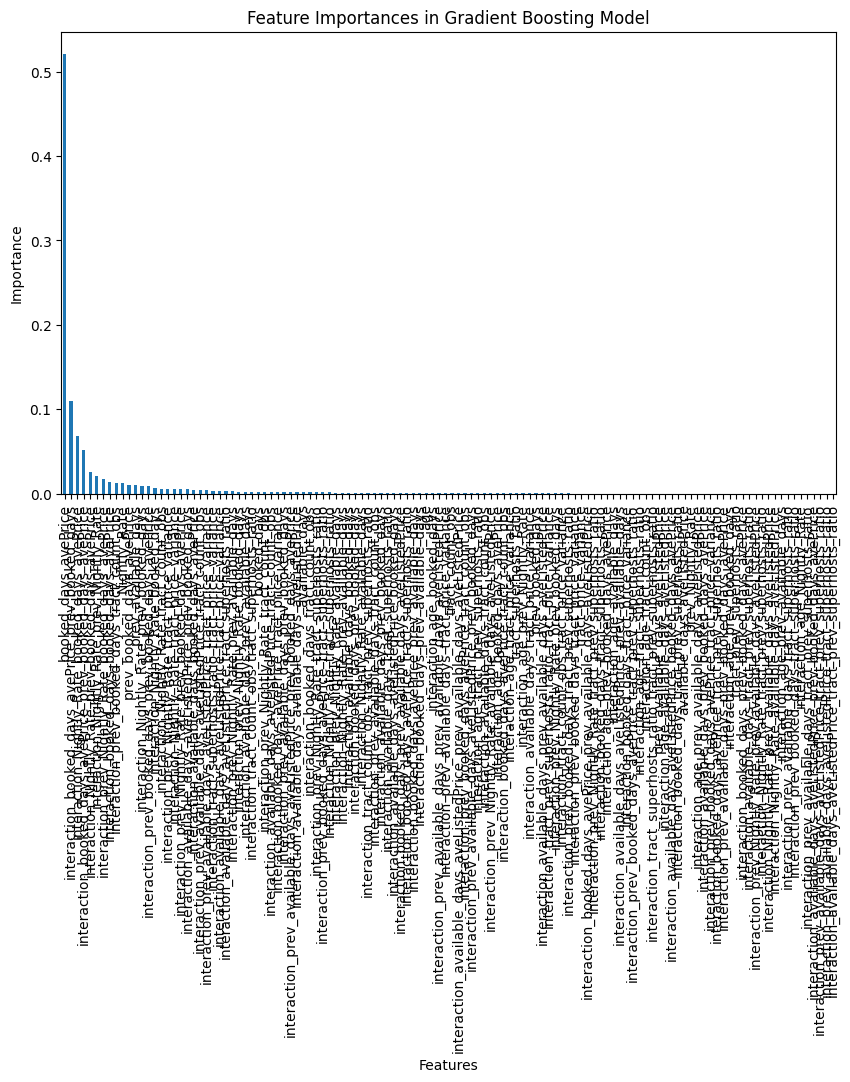

In [13]:
import pandas as pd
import numpy as np
import itertools
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


# Load the CSV file into a DataFrame
df = pd.read_csv('airbnb_Miami.csv', parse_dates=['Created Date', 'Scraped Date'])

# Define the predictors
predictors = [
    'age', 'Nightly_Rate', 'prev_Nightly_Rate', 'available_days',
    'available_days_aveListedPrice', 'booked_days', 'booked_days_avePrice',
    'prev_available_days', 'prev_available_days_aveListedPrice',
    'prev_booked_days', 'prev_booked_days_avePrice', 'tract_count_obs',
    'tract_superhosts_ratio', 'tract_prev_superhosts_ratio',
    'tract_price_variance'
]

# Handle missing values for continuous variables and create new variables
for col in predictors:
    if col != 'age':  # 'age' will be calculated later
        df[col] = df[col].fillna(df[col].mean())

df['age'] = (df['Scraped Date'] - df['Created Date']).dt.days
df['Avg_booking'] = df.apply(lambda row: row['revenue_period_tract'] / row['booked_days_period_tract']
                             if row['booked_days_period_tract'] > 0 else 0, axis=1)

# Generate interaction terms
interaction_terms = list(itertools.combinations(predictors, 2))
for term in interaction_terms:
    df[f'interaction_{term[0]}_{term[1]}'] = df[term[0]] * df[term[1]]

# Update the list of predictors to include interaction terms
final_predictors = predictors + [f'interaction_{term[0]}_{term[1]}' for term in interaction_terms]

# Split the data into training and validation sets
df_train = df[df['superhost_period_all'].between(5, 12)]
df_validation = df[df['superhost_period_all'].between(13, 15)]

# Aggregate at the census_tract level
grouped_train = df_train.groupby('census_tract')[final_predictors + ['Avg_booking']].mean().reset_index()
grouped_validation = df_validation.groupby('census_tract')[final_predictors + ['Avg_booking']].mean().reset_index()

# Prepare the predictors (X) and the target (y) for training data
X_train = grouped_train[final_predictors]
y_train = grouped_train['Avg_booking']

# Fit the Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.05, random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions and evaluate the model on training data
y_train_pred = gb_model.predict(X_train)
r_squared_train = r2_score(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)

# Prepare validation data
X_validation = grouped_validation[final_predictors]
y_validation = grouped_validation['Avg_booking']

# Make predictions and evaluate the model on validation data
y_pred_validation = gb_model.predict(X_validation)
r_squared_validation = r2_score(y_validation, y_pred_validation)
mse_validation = mean_squared_error(y_validation, y_pred_validation)

# Print the evaluation metrics
print(f"R-squared (Training): {r_squared_train}")
print(f"Mean Squared Error (Training): {mse_train}")
print(f"R-squared (Validation): {r_squared_validation}")
print(f"Mean Squared Error (Validation): {mse_validation}")


# Extract feature importances from the model
feature_importances = gb_model.feature_importances_

# Create a pandas series for easy plotting
importances = pd.Series(feature_importances, index=X_train.columns)

# Sort the feature importances
sorted_importances = importances.sort_values(ascending=False)

# Plot the feature importances
plt.figure(figsize=(10,6))
sorted_importances.plot(kind='bar')
plt.title('Feature Importances in Gradient Boosting Model')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()
